
>>> Running Rationality Check: Fixed Reactive vs Optimized Strategic <<<
  > Simulating Reactive Agent...
  > Simulating Strategic Planner (Robust Mode)...
  > Generating plots...
  > Plotting Improved Mechanics...
  > Plotting Clean Utility Drivers (Improved)...


/Users/atlaie/Desktop/Pour Demain/horizon_scanning/geoai/plotting.py:253: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  crisis_starts = crisis_mask.index[crisis_mask & ~crisis_mask.shift(1).fillna(False)]
/Users/atlaie/Desktop/Pour Demain/horizon_scanning/geoai/plotting.py:253: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  crisis_starts = crisis_mask.index[crisis_mask & ~crisis_mask.shift(1).fillna(False)]


  > Plotting Intelligence Matrix...


/Users/atlaie/Desktop/Pour Demain/horizon_scanning/geoai/plotting.py:393: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.98])


  > Plotting Network Breakdown...
  > Plotting Persona Evolution...

>>> Running Scenario Showcase: The Semiconductor Stranglehold <<<
  > Plotting Blockade Showcase...
>>> Done. Check 'figures/' folder.


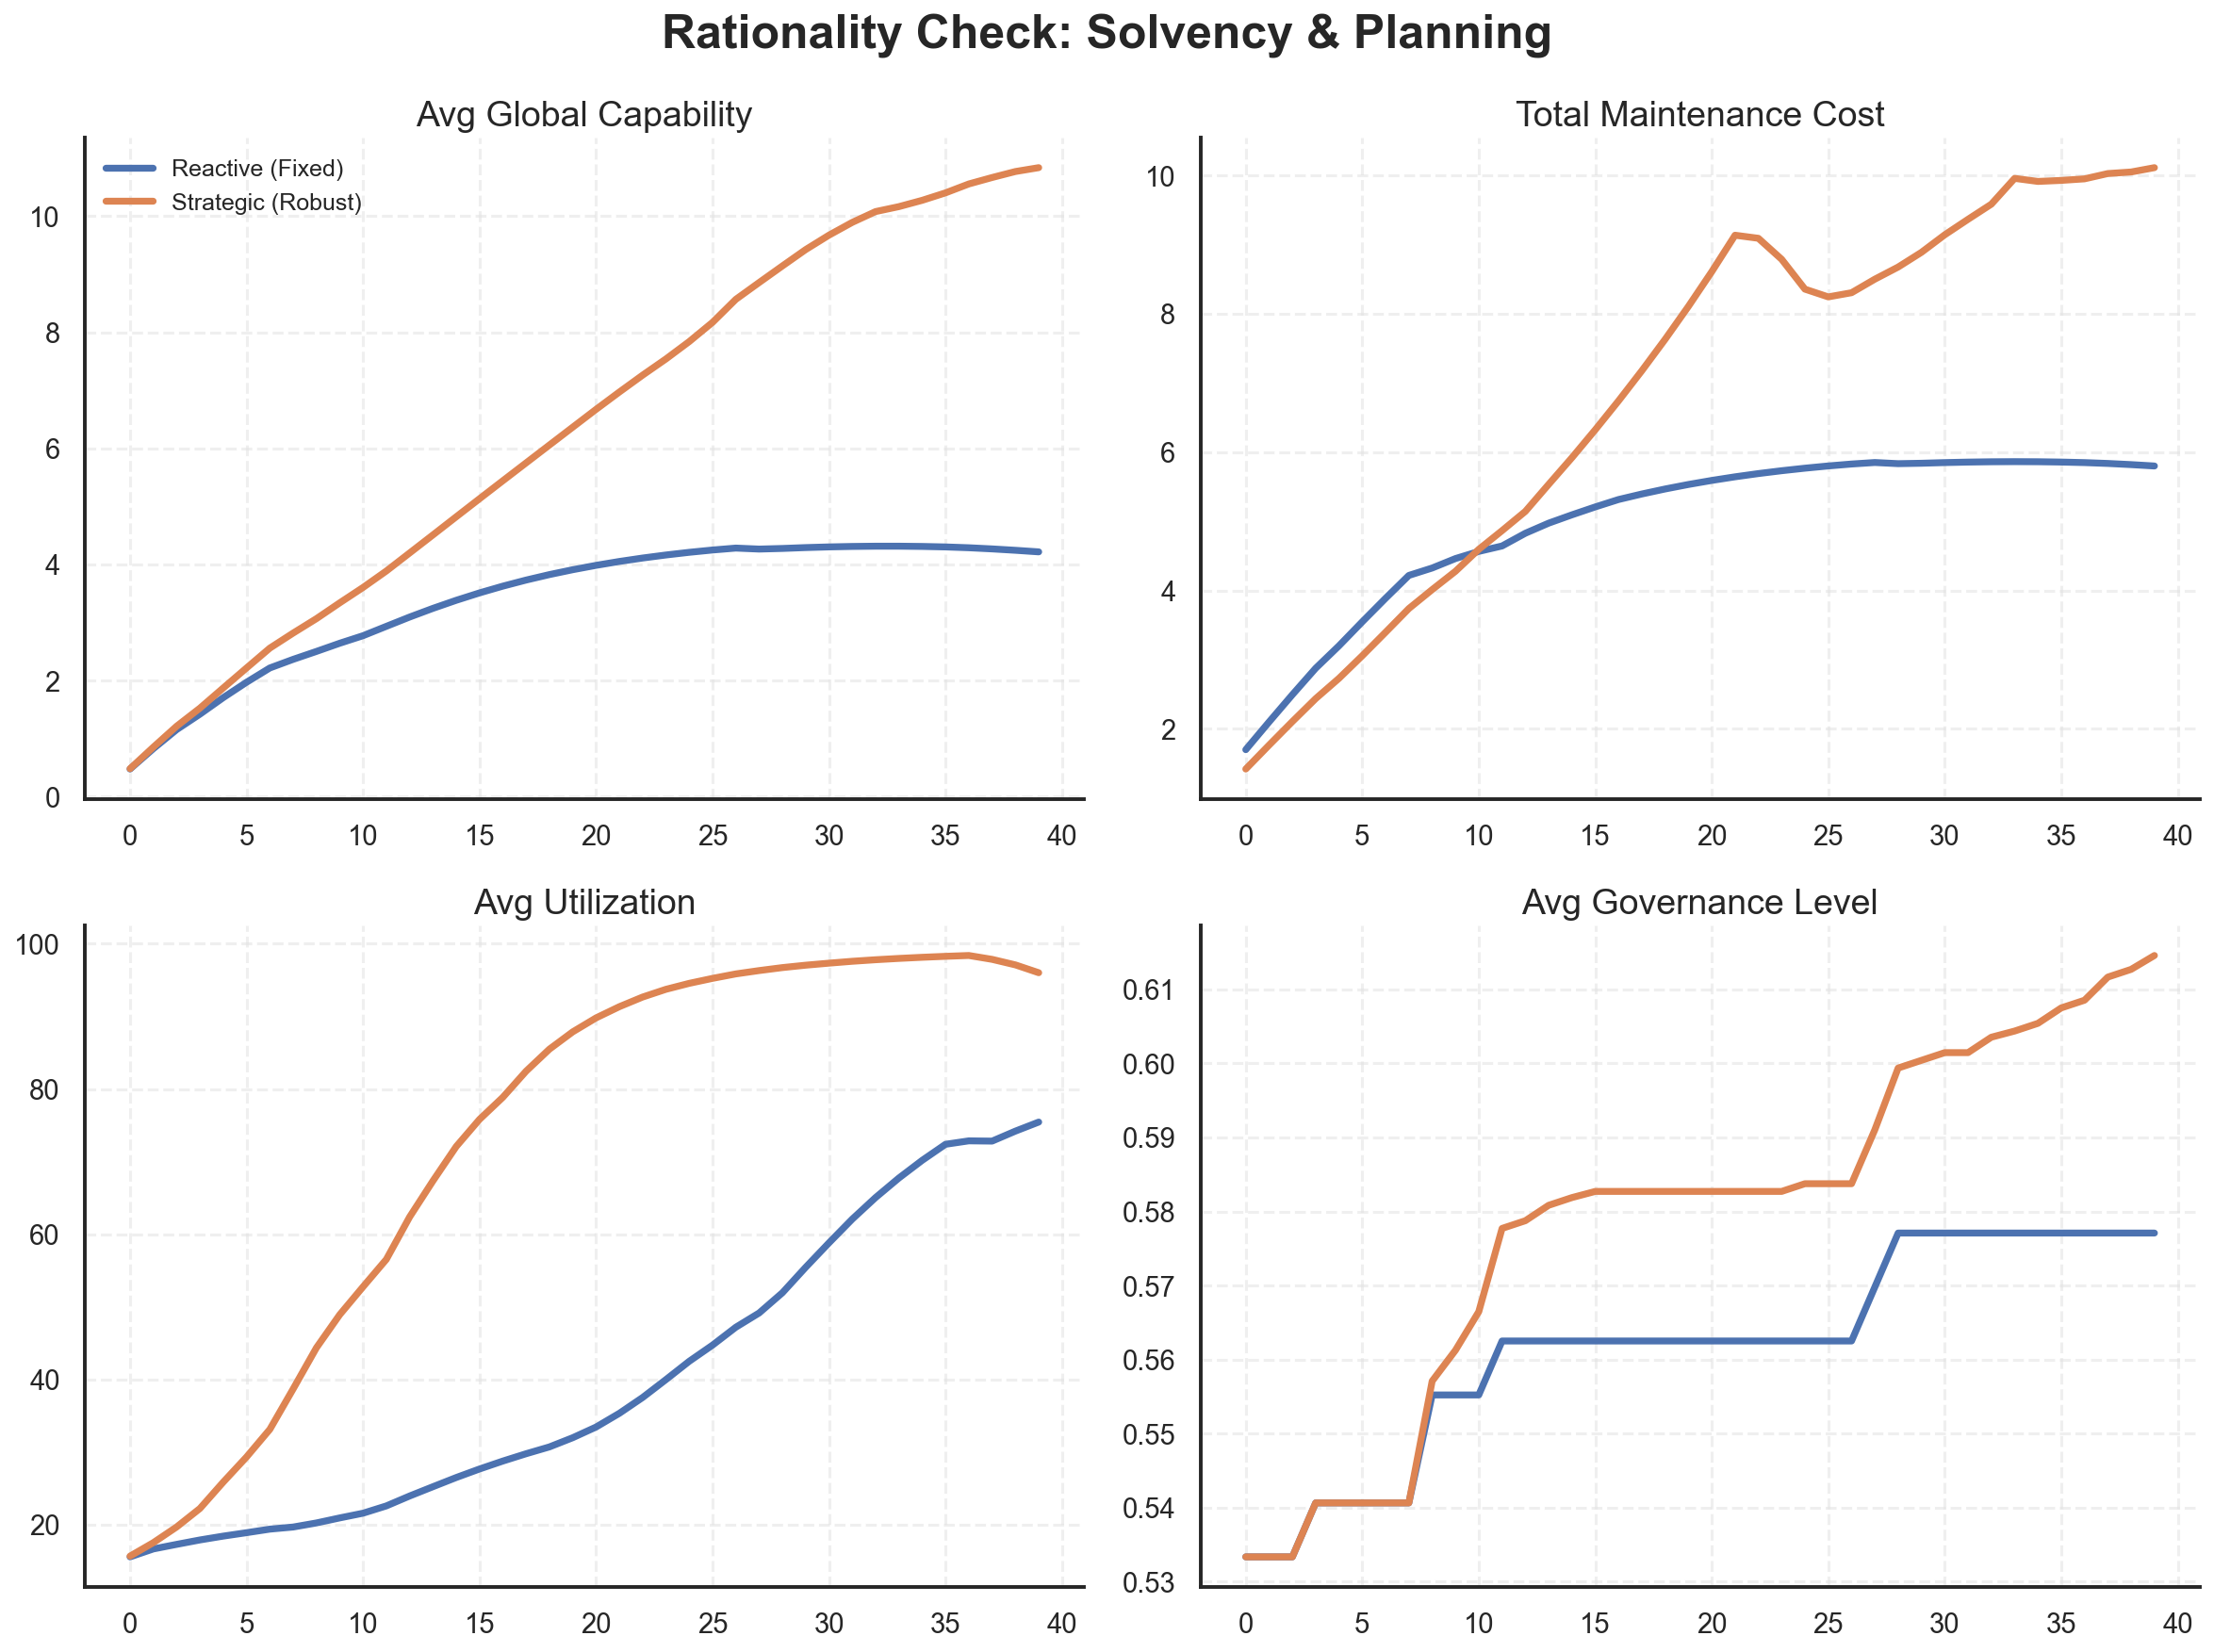

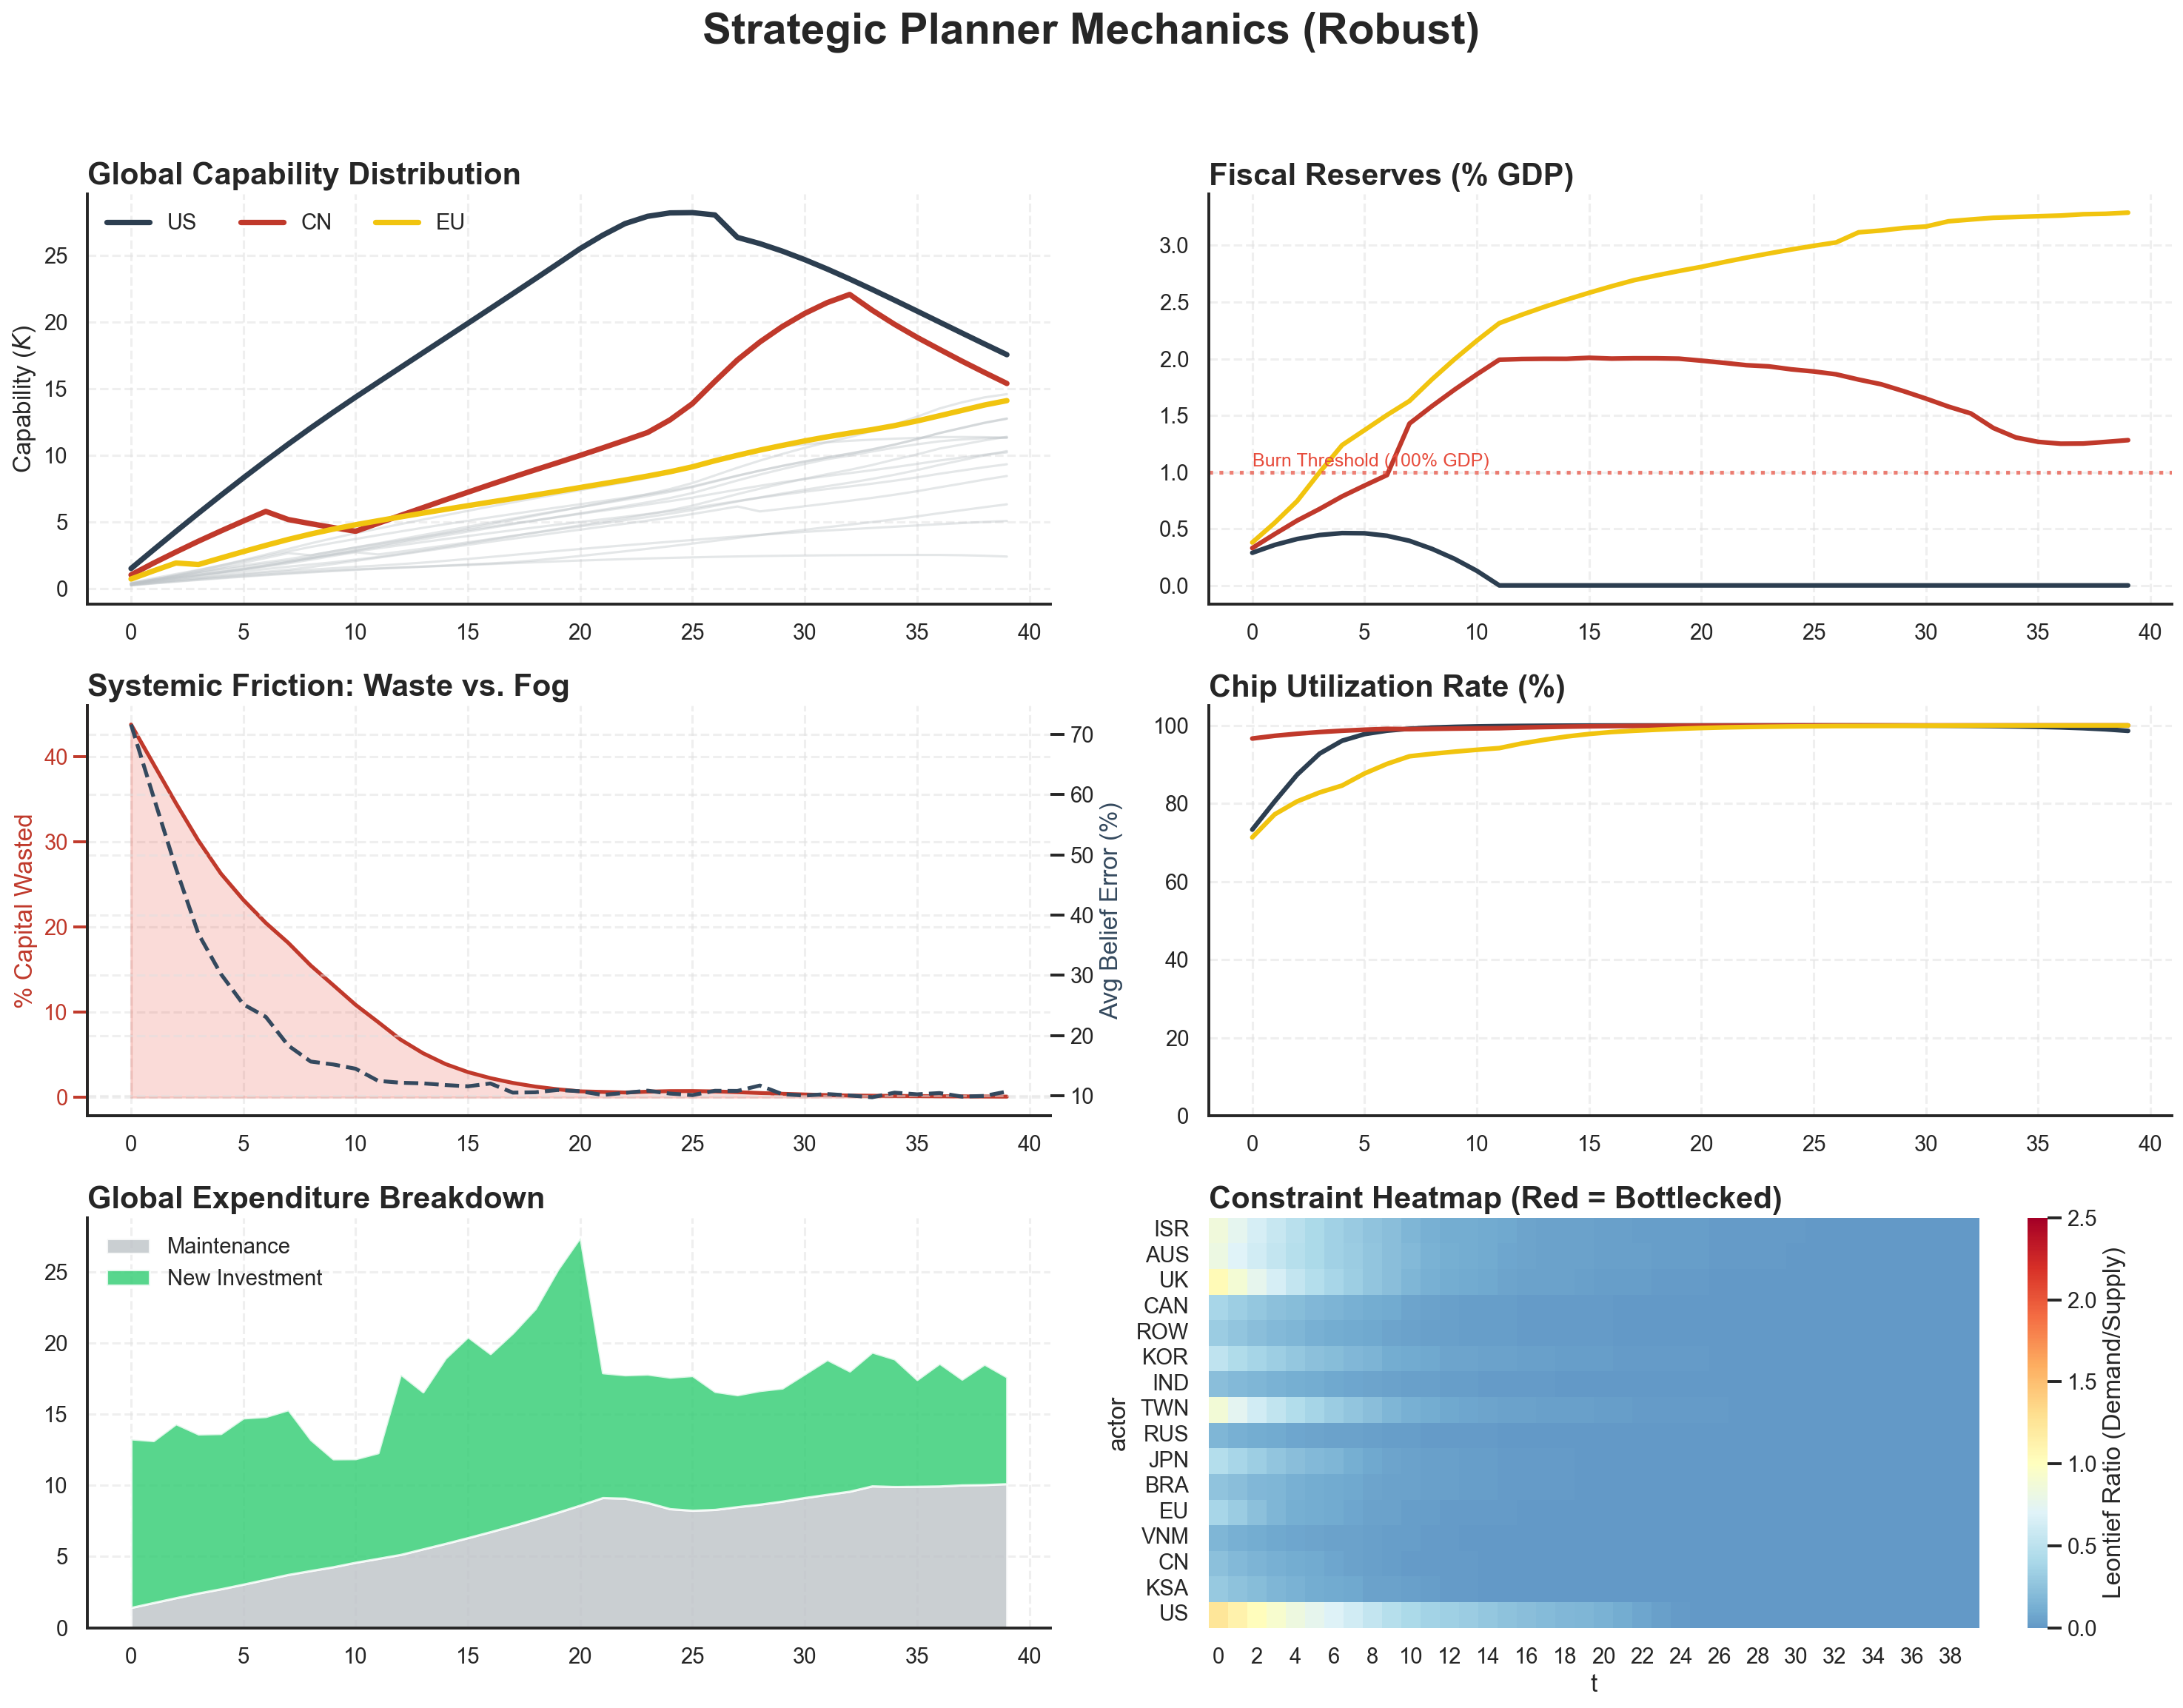

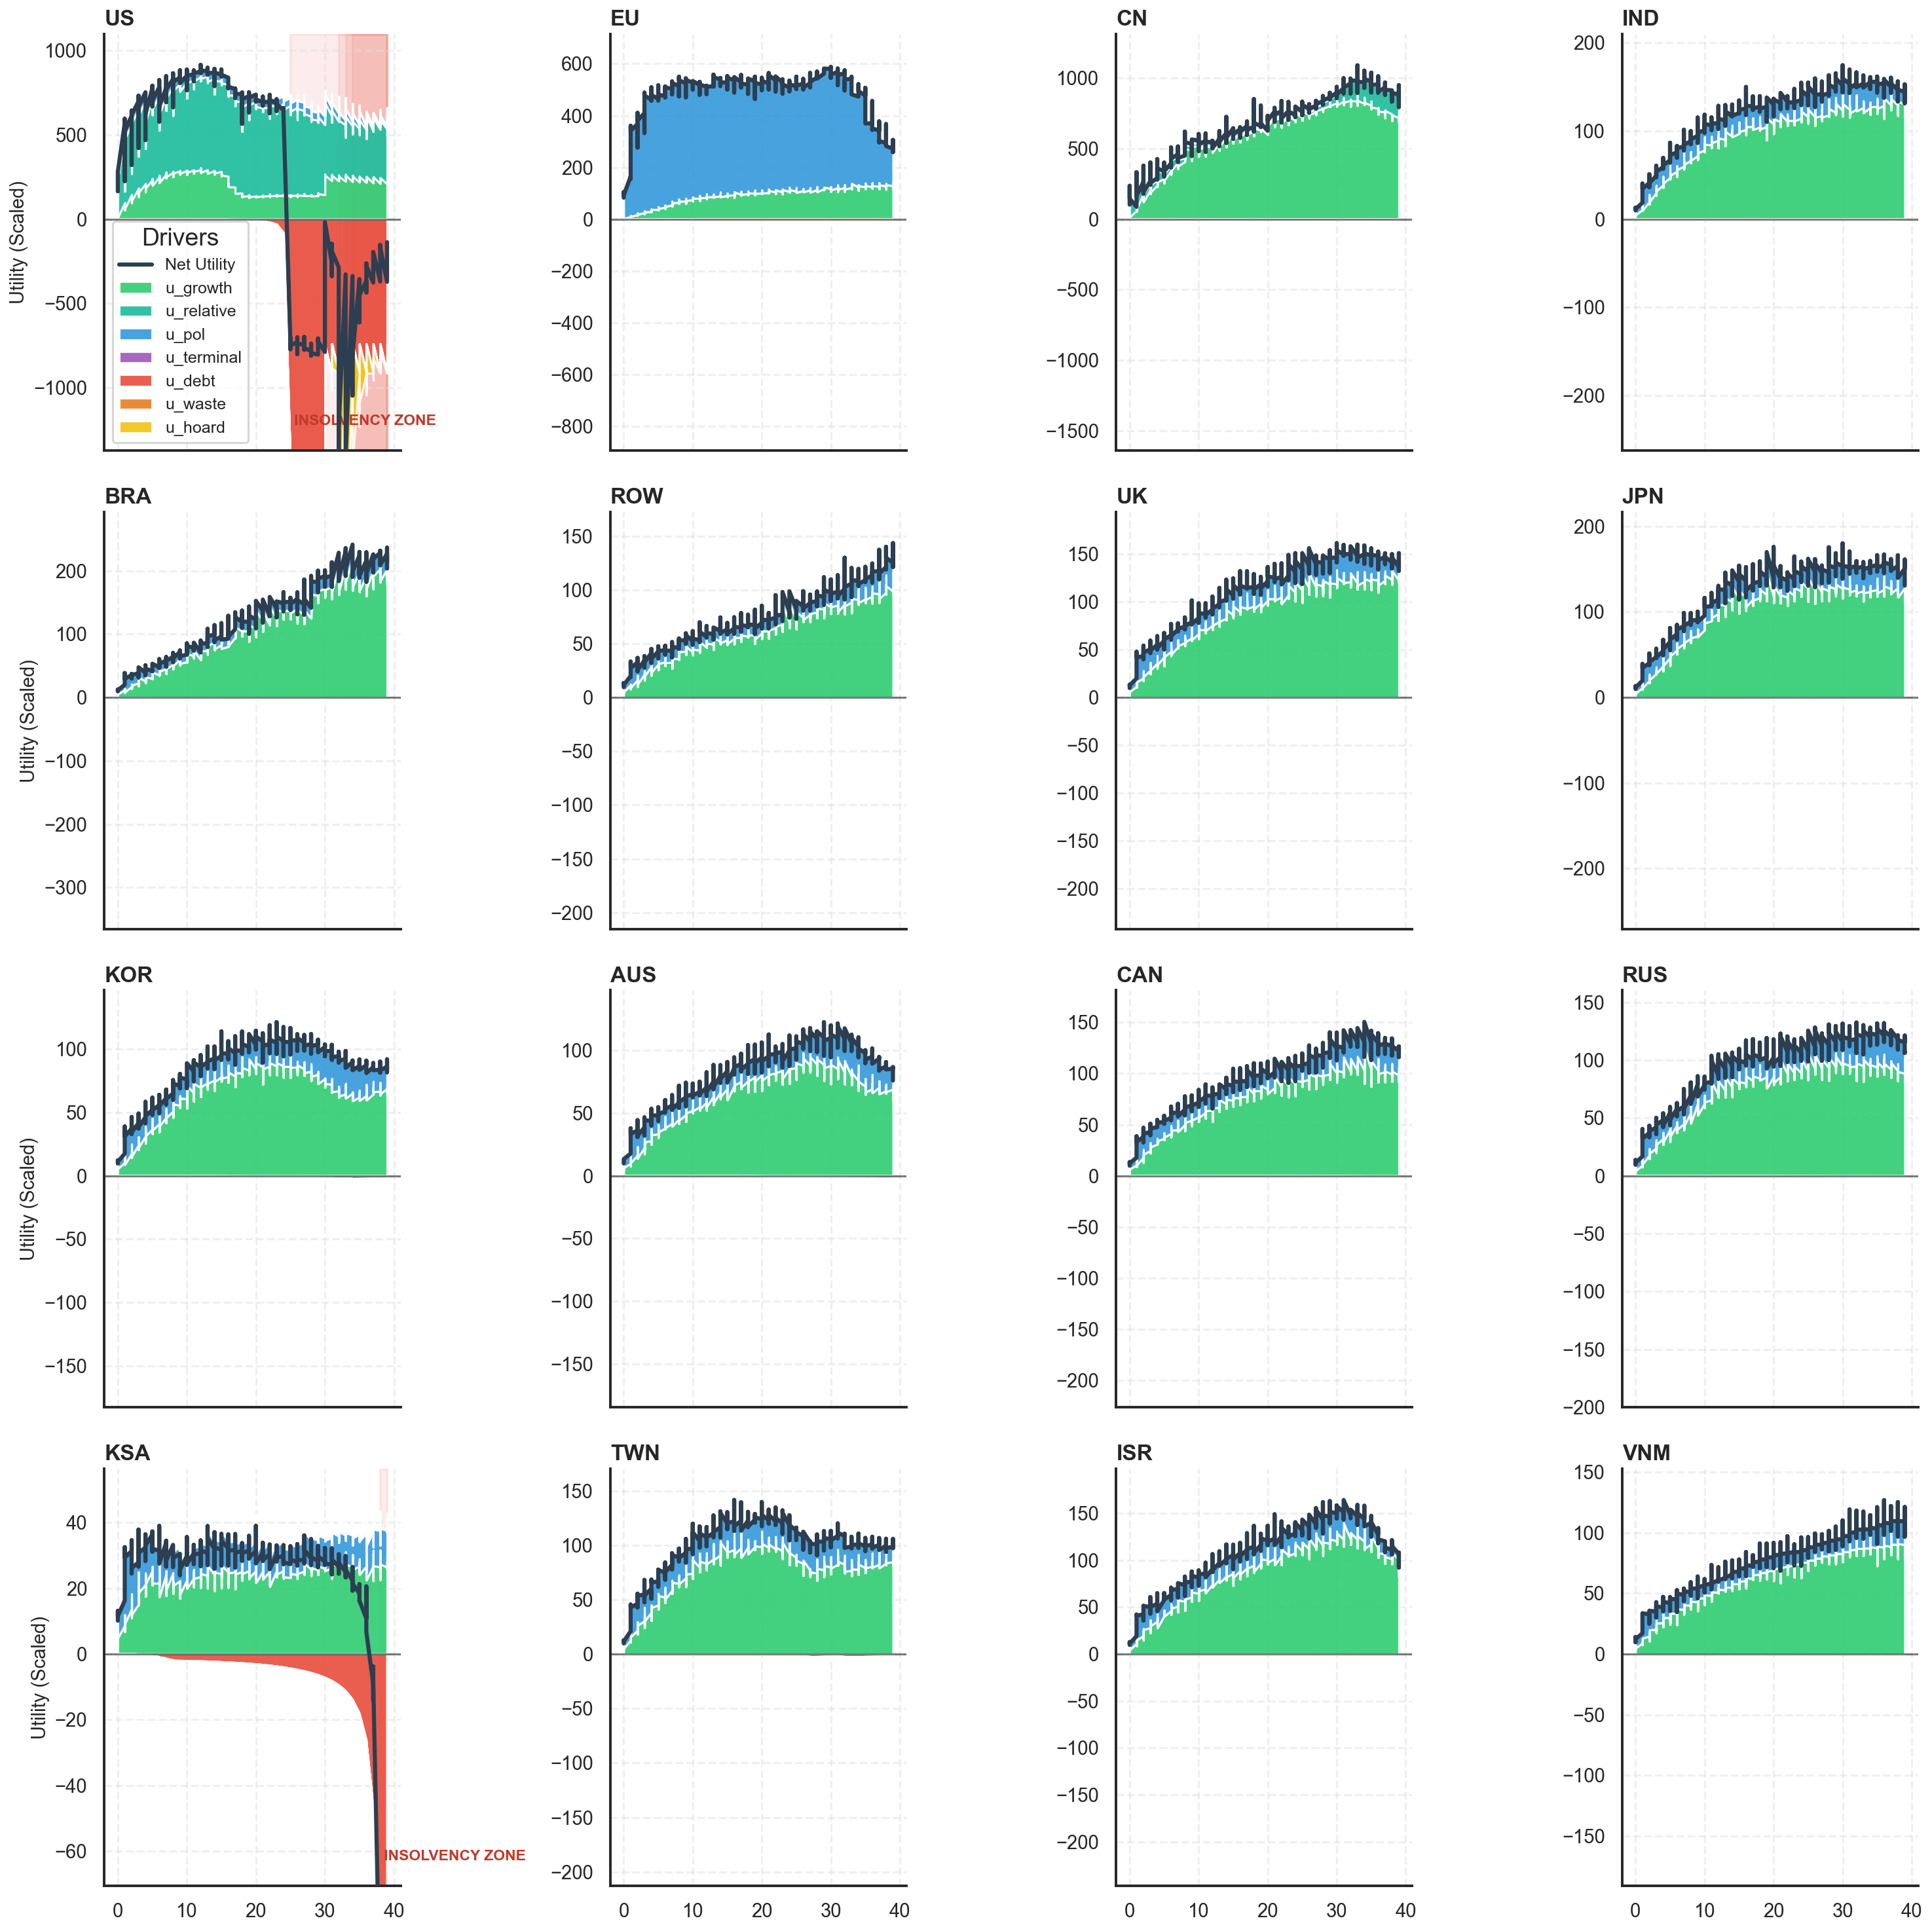

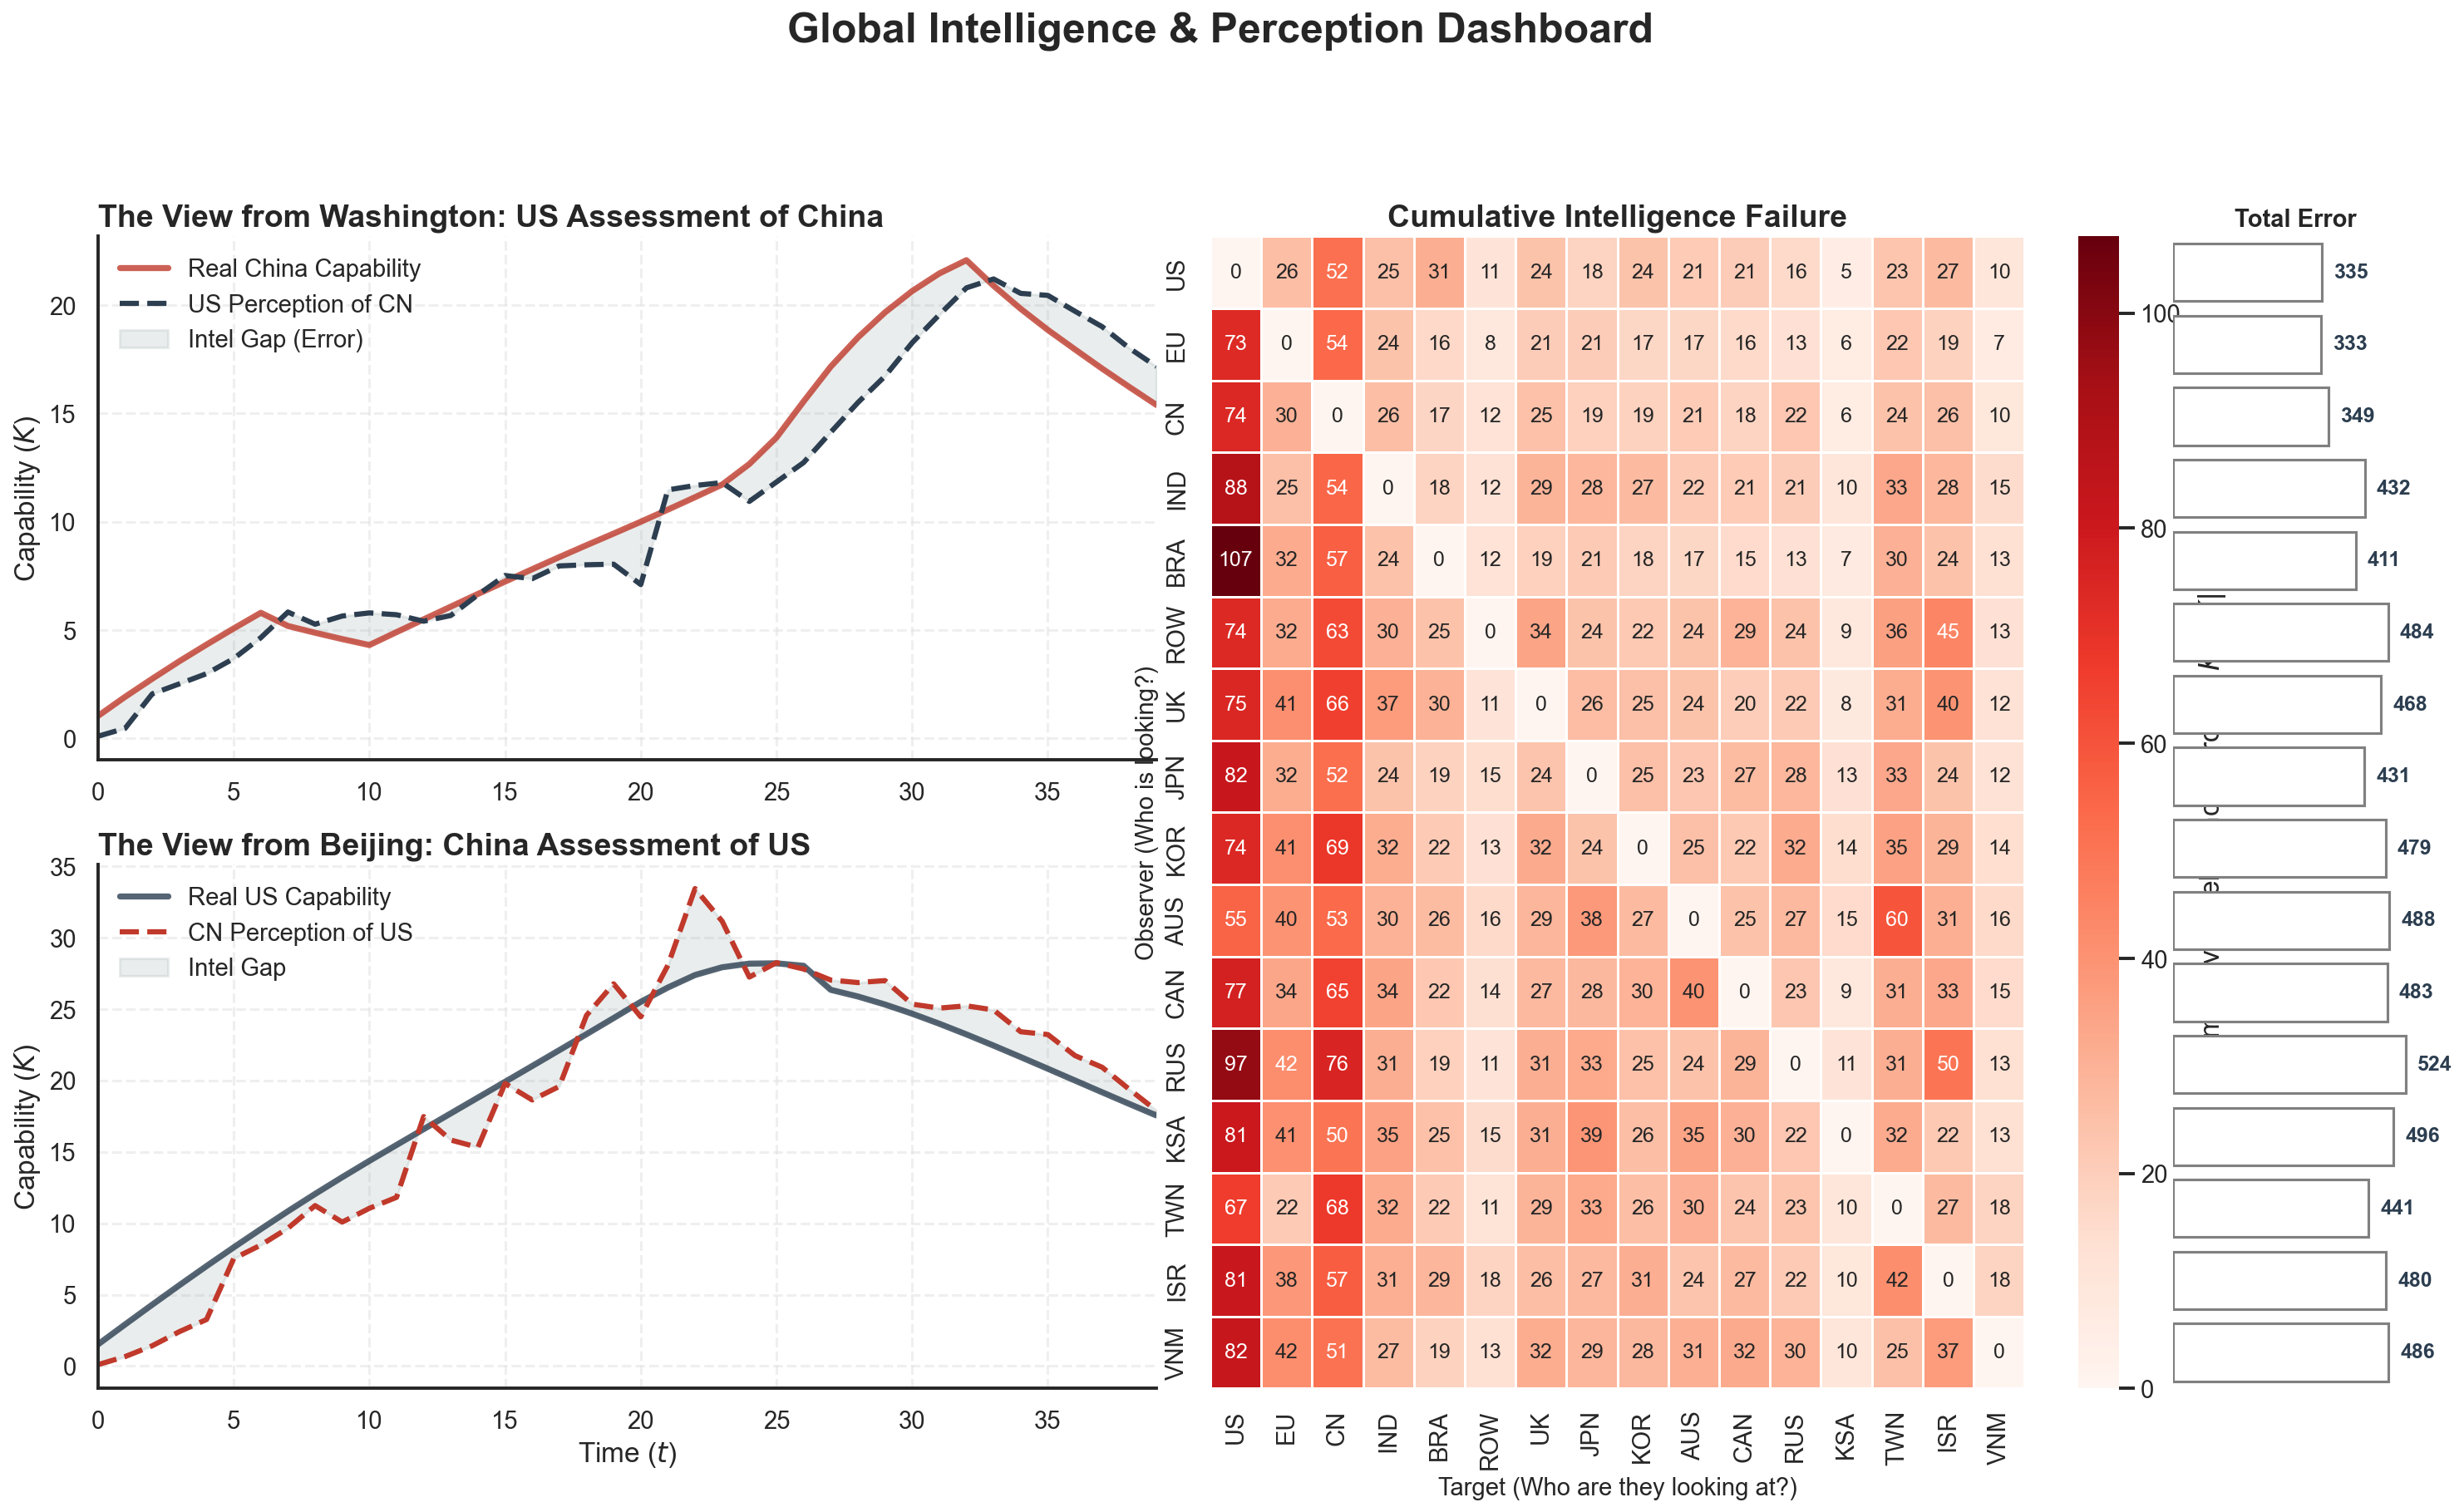

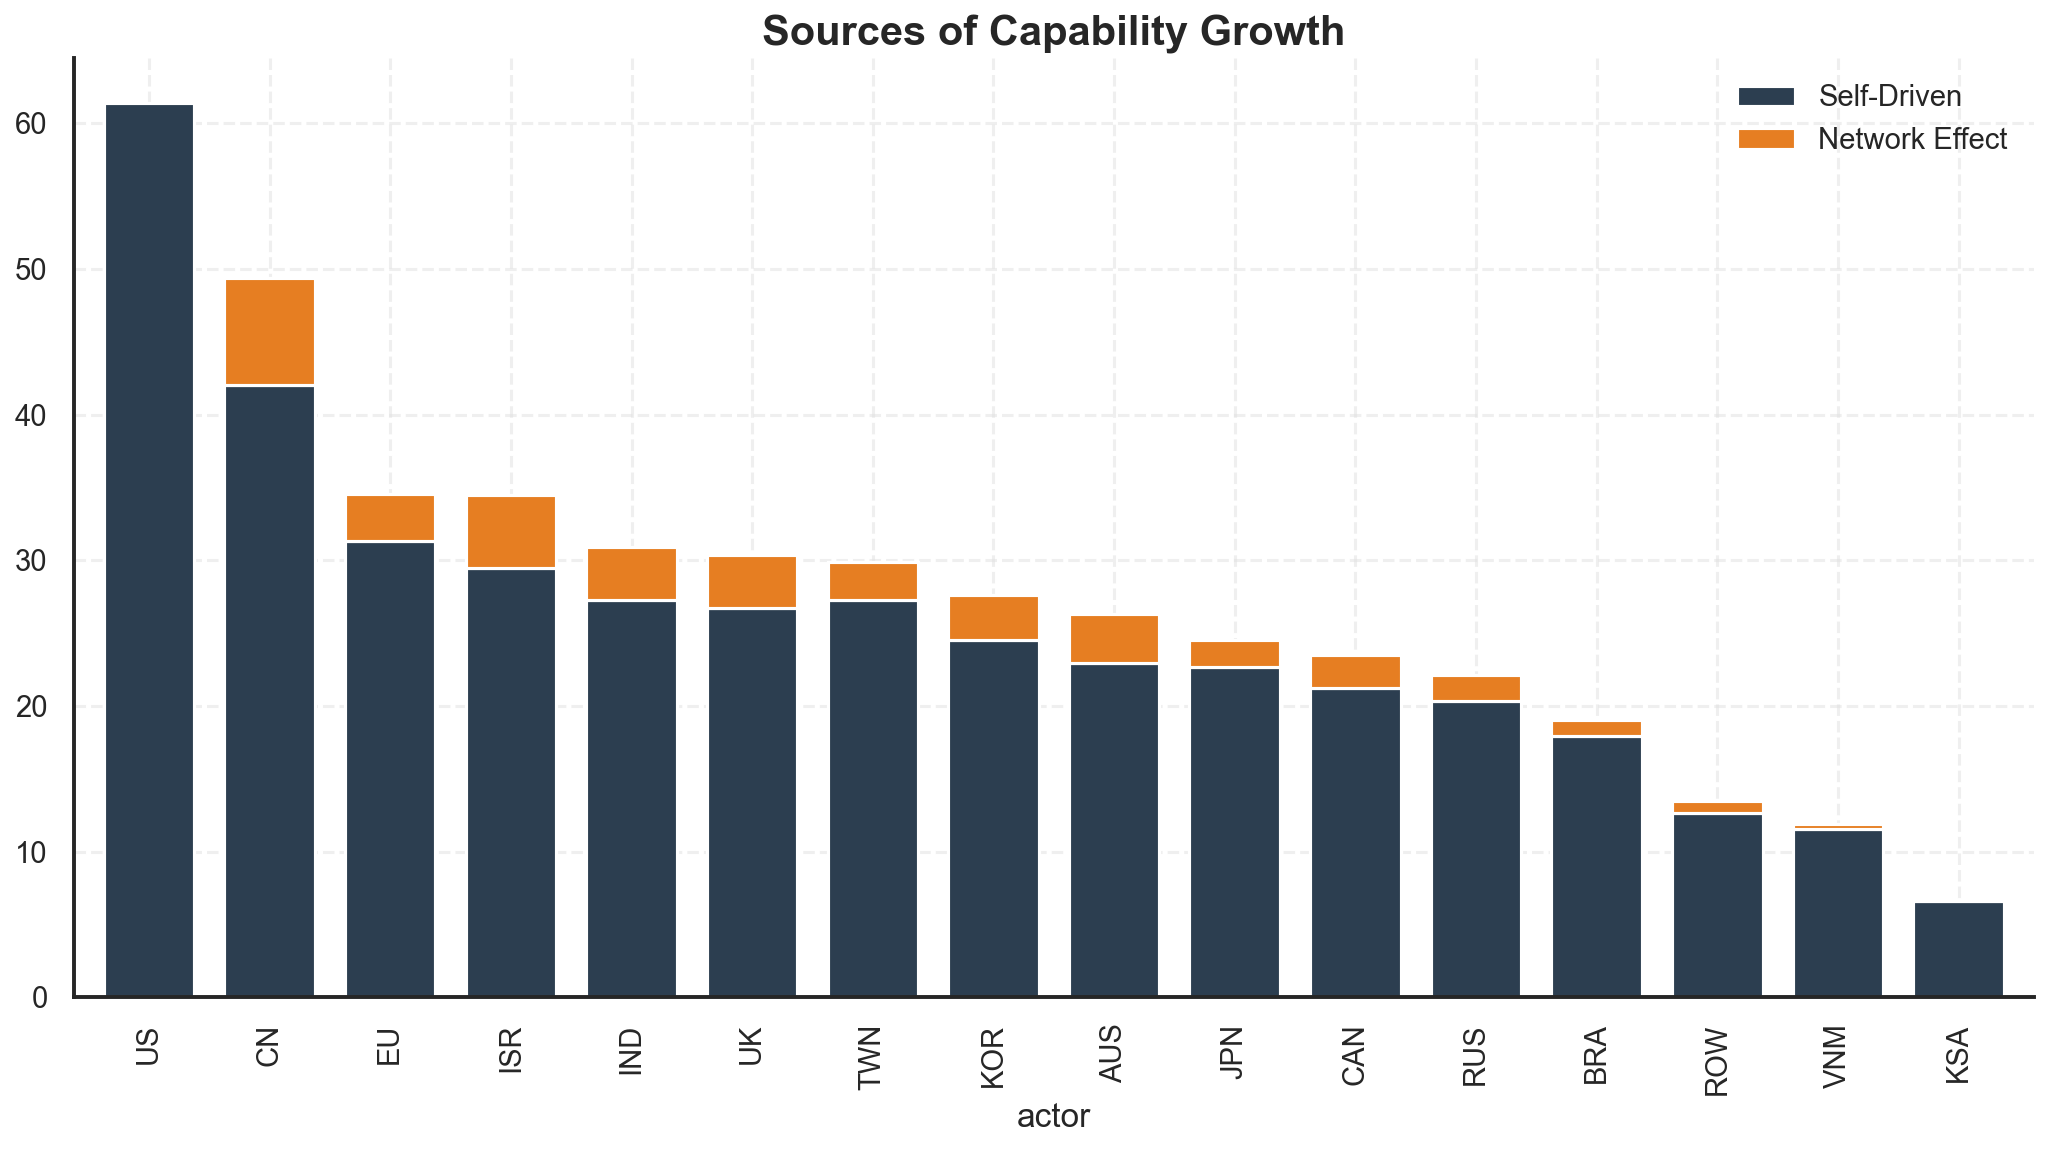

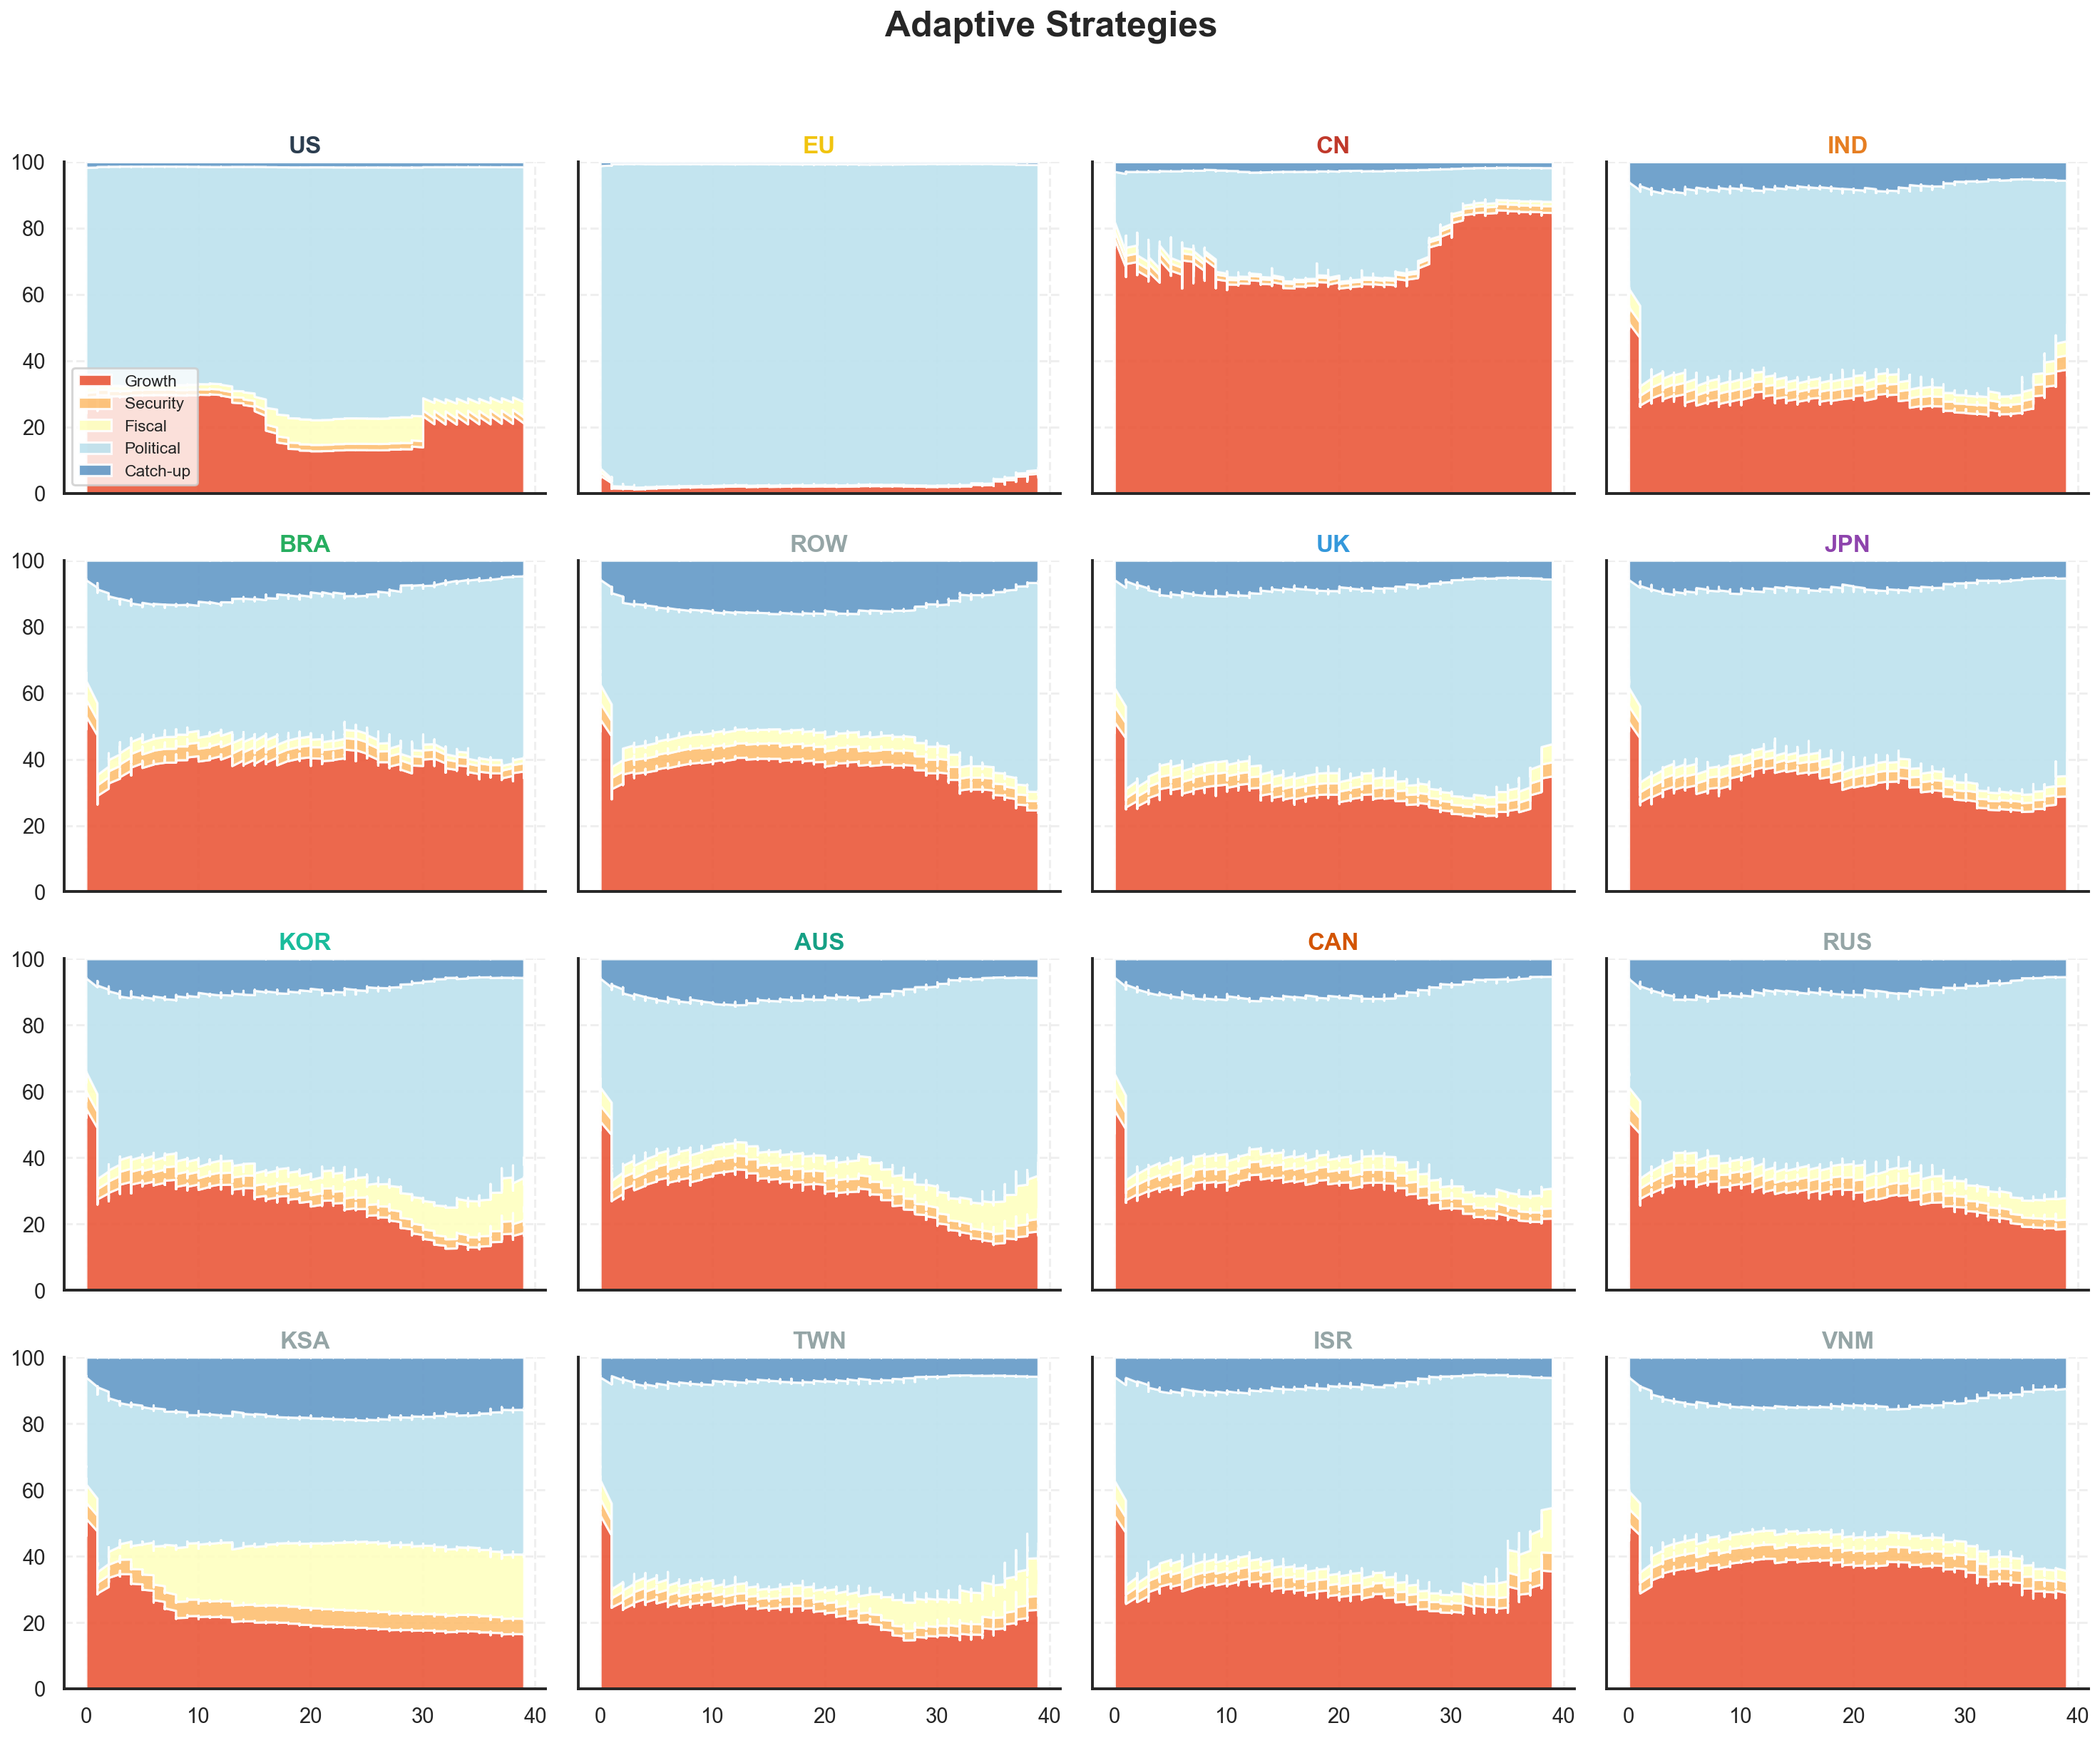

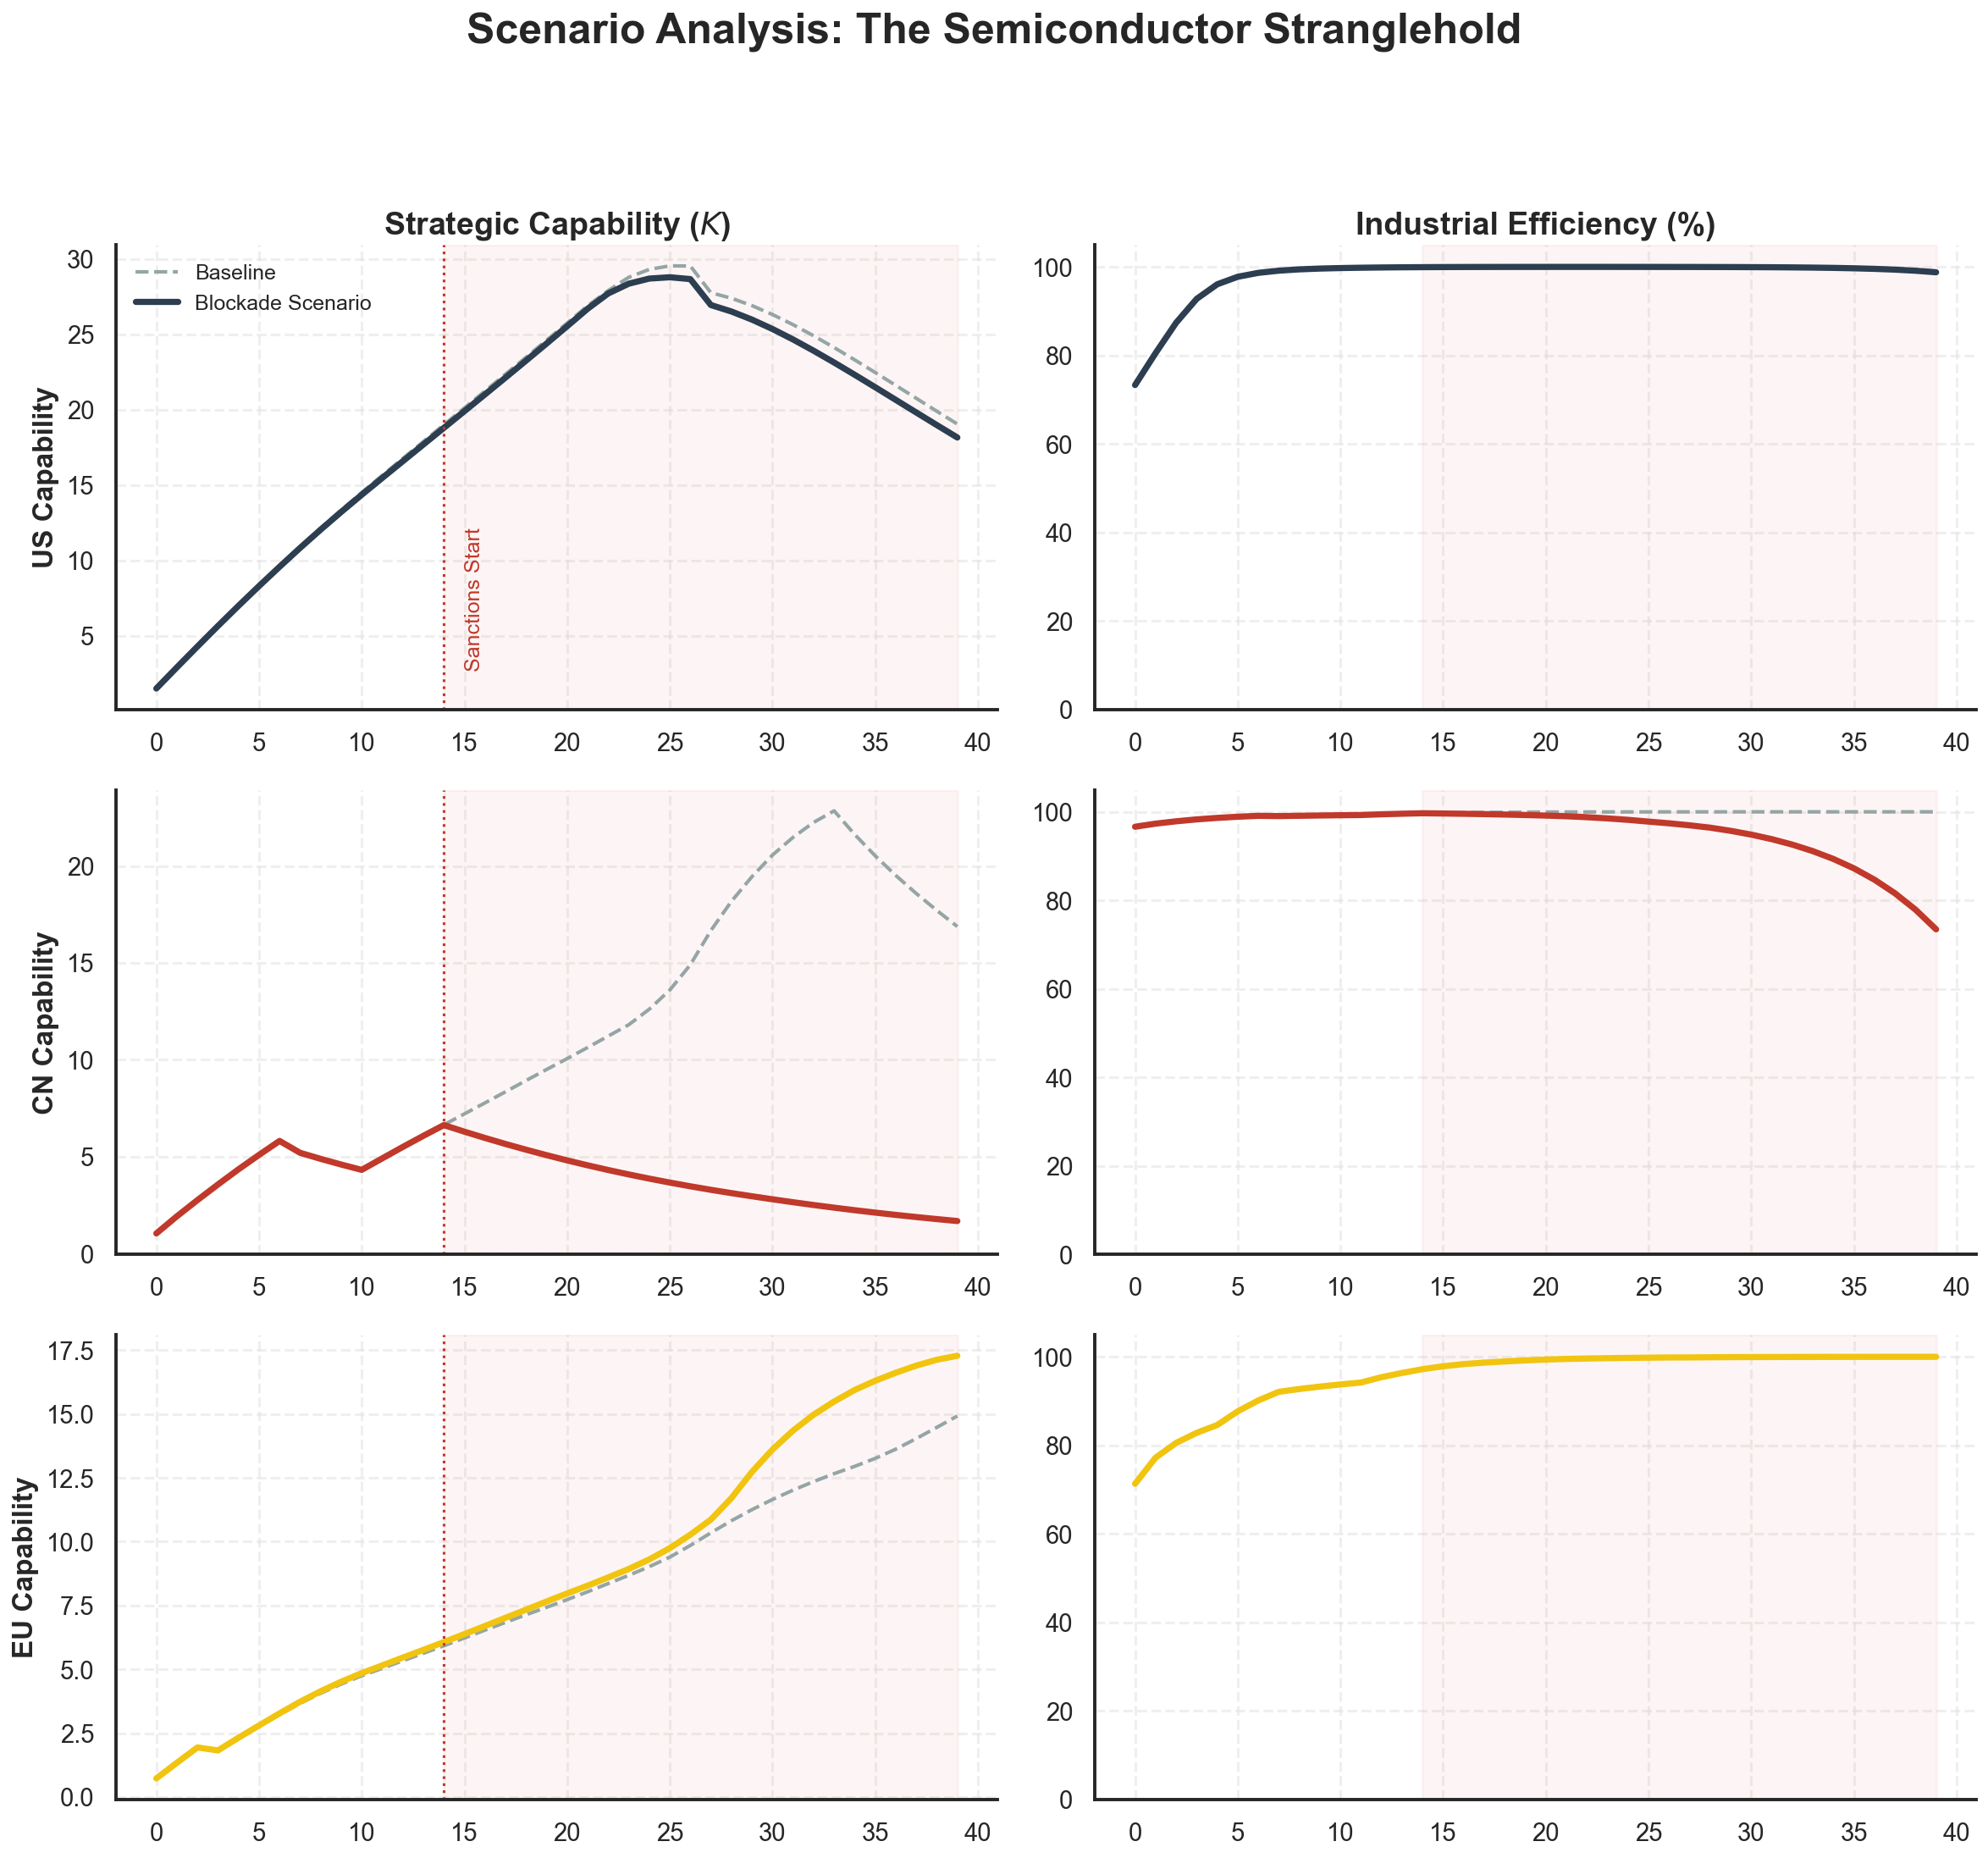

In [1]:
# main.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy

from geoai.config import Config, Heterogeneity, Exogenous, Rates, Weights
from geoai.plotting import (
    plot_mechanics_dashboard,
    plot_family_comparison_enhanced,
    plot_strategic_drivers_improved, 
    plot_fog_of_war_dashboard,        
    plot_network_breakdown,        
    plot_persona_evolution,
    plot_blockade_showcase
)
from geoai.policies import (
    policy_family1_baseline, 
    policy_strategic_personas,
    PLANNER_LOGS
)

from geoai.scenarios import (
    run_semiconductor_stranglehold
)

def create_empirically_grounded_config() -> Config:
    # [UPDATED] Added TWN, ISR, VNM to the actor list
    actors = ["US","EU","CN","IND","BRA","ROW","UK","JPN","KOR","AUS","CAN", "RUS", "KSA", "TWN", "ISR", "VNM"]

    # --- 1. Initial Conditions (2025 Real-World Baselines) ---
    
    # C0: Compute Stock
    C0 = {
        "US": 3.20, "CN": 1.50, "EU": 0.70, 
        "JPN": 0.30, "UK": 0.25, "IND": 0.25, 
        "KOR": 0.20, "AUS": 0.15, "CAN": 0.15, 
        "RUS": 0.15, "BRA": 0.12, "KSA": 0.12,
        
        # [NEW] Taiwan: "The Silicon Shield"
        # High value, but physically smaller datacenter footprint than majors.
        "TWN": 0.35, 
        
        # [NEW] Israel: "The Elite Boutique"
        # Dense, high-quality compute, but limited by scale/energy.
        "ISR": 0.20,
        
        # [NEW] Vietnam: "The Assembly Hub"
        # Emerging capacity, benefitting from "China Plus One", but starting low.
        "VNM": 0.08,
        
        "ROW": 0.05
    }

    # E0: Energy Infrastructure (TWh + Stability)
    E0 = {
        "CN": 4.00, "US": 1.80, "EU": 1.10, "IND": 0.70, "RUS": 0.60,
        "JPN": 0.40, "BRA": 0.30, "CAN": 0.25, "KOR": 0.25, "UK": 0.15,
        "AUS": 0.12, "KSA": 0.25,
        "TWN": 0.25, # Severe constraint. 98% imported energy. Vulnerable grid.
        "ISR": 0.15, # Small grid, but highly efficient/gas-powered.
        "VNM": 0.30, # ~300 TWh. Fast growing, but historically prone to blackouts.
        
        "ROW": 0.10
    }

    # D0: Talent & Data Stock
    D0 = {
        "US": 3.00, "CN": 0.80, "EU": 0.40, "UK": 0.40, "CAN": 0.30,
        "RUS": 0.25, "JPN": 0.25, "KOR": 0.20, "IND": 0.20, "AUS": 0.15,
        "BRA": 0.10, "KSA": 0.05,
        "TWN": 0.50, # Extremely high hardware/process engineering talent.
        "ISR": 0.35, # Global tier. Unit 8200 pipeline produces elite AI talent.
        "VNM": 0.15, # Strong literacy/STEM base, but mostly mid-tier assembly/coding.
        "ROW": 0.10
    }
    
    weights = Weights()
    rates = Rates()

    # --- Heterogeneity ---
    het = Heterogeneity(
        # Investment Efficiency (Beta_C)
        beta_C={
            "US":0.14, "CN":0.09, "EU":0.07, "UK": 0.08, "JPN":0.07, "IND": 0.08,
            "ISR": 0.12, # High efficiency (Start-up nation culture)
            "TWN": 0.10, # Very efficient capital deployment in semis
            "VNM": 0.06  # Developing financial markets
        }, 
        
        # Governance Friction (Kappa_G)
        kappa_G={"EU":0.65, "US":0.30, "CN":0.45, "UK":0.30, "VNM": 0.40},
        
        # Insolvency Threshold
        insolvency_threshold={
            "US": 4.50, "JPN": 5.50, "CN": 3.00, "EU": 2.20, 
            "UK": 2.50, "BRA": 1.50, "IND": 1.50,
            "ISR": 2.00, # Resilient economy, war-tested
            "TWN": 2.50, # Strong reserves
            "VNM": 1.20, # Developing market constraint (Debt > 60% is risky)
            "ROW": 1.20
        },

        # Panic Thresholds
        panic_threshold={
            "US":1.05, "CN":1.30, "EU":1.0, "RUS": 1.40, "KSA": 0.90,
            # [NEW]
            "TWN": 0.80, # Existential threat perception. Will mobilize instantly.
            "ISR": 0.85, # Surrounded by threats, highly sensitive to capability gaps.
            "VNM": 1.10  # Pragmatic. Concerned but balances relationships.
        },
        
        # [NEW] Export Power: If this actor sanctions you, how much does it hurt?
        # Default is 1.0.
        export_sender_power={
            "US": 2.0, "EU": 1.5,
            "TWN": 5.0, # The "Silicon Shield". If TWN cuts you off, it's fatal.
            "ISR": 1.2, # Niche but critical (cyber/fintech/agtech).
            "CN": 1.5
        },
        
        # Tax Rates
        tax_rate={
            "US": 0.26, "EU": 0.28, "CN": 0.25, "UK": 0.25, 
            "RUS": 0.20, "KSA": 0.05, "BRA": 0.34, "IND": 0.25, "JPN": 0.30,
            "ISR": 0.23,
            "TWN": 0.20,
            "VNM": 0.20 # Incentives for FDI
        }
    )

    return Config(
        actors=actors,
        T=40, 
        seed=21,
        weights=weights,
        rates=rates,
        C0=C0, D0=D0, E0=E0, 
        G0_sec={k: 0.60 for k in actors}, 
        
        # [UPDATED] Alliances
        A0_edges=[
            ("IND","BRA"),("CN","ROW"),("CN","IND"),("CN","BRA"), 
            ("US","EU"),("US","UK"),("US","CAN"),("US","AUS"),("US","JPN"),("US","KOR"), 
            ("UK","CAN"),("UK","AUS"),("JPN","AUS"),("JPN","KOR"),("EU","UK"),
            ("IND","US"),("AUS","IND"),
            
            # [NEW] Israel: Strongly aligned with US/West
            ("US", "ISR"), ("EU", "ISR"), ("UK", "ISR"),
            
            # [NEW] Taiwan: Informal but vital US/JPN link
            # Note: Not formally in NATO, but functionally integrated for tech transfer
            ("US", "TWN"), ("JPN", "TWN"),
            
            # [NEW] Vietnam: The "Bamboo Diplomacy"
            # Connects to both US (Comprehensive Strategic Partner) and rivals?
            # For now, let's link them to US and IND (Counter-weight to CN)
            ("US", "VNM"), ("IND", "VNM"), ("JPN", "VNM")
        ],
        X0=None, 
        het=het,
        gpaith_enabled=True,
        sigma_self_map={"US":0.01,"EU":0.01,"CN":0.08},
        sigma_ally_map={"US":0.02,"EU":0.02},
        sigma_rival_map={"US":0.25,"EU":0.20,"CN":0.35}, 
    )
def run_rationality_check(base_cfg: Config):
    from geoai.engine import GeoAIGame
    print("\n>>> Running Rationality Check: Fixed Reactive vs Optimized Strategic <<<")
    PLANNER_LOGS.clear()
    print("  > Simulating Reactive Agent...")
    game1 = GeoAIGame(deepcopy(base_cfg))
    df1 = game1.run(policy=policy_family1_baseline)
    
    print("  > Simulating Strategic Planner (Robust Mode)...")
    PLANNER_LOGS.clear()
    game2 = GeoAIGame(deepcopy(base_cfg))
    df2 = game2.run(policy=policy_strategic_personas)
    
    results = {
        "Reactive (Fixed)": {"cfg": deepcopy(base_cfg), "df": df1},
        "Strategic (Robust)": {"cfg": deepcopy(base_cfg), "df": df2}
    }
    
    print("  > Generating plots...")
    plot_family_comparison_enhanced(results, "Rationality Check: Solvency & Planning")
    plt.savefig('figures/rationality_check_comparison.png', dpi=100)
    
    print("  > Plotting Improved Mechanics...")
    plot_mechanics_dashboard(df2, deepcopy(base_cfg), title="Strategic Planner Mechanics (Robust)")
    plt.savefig('figures/rationality_check_mechanics.png', dpi=100)

    print("  > Plotting Clean Utility Drivers (Improved)...")
    fig_util = plot_strategic_drivers_improved(PLANNER_LOGS, actors=None) 
    if fig_util: fig_util.savefig('figures/rationality_check_utility.png', dpi=100)
    
    print("  > Plotting Intelligence Matrix...")
    fig_fog = plot_fog_of_war_dashboard(df2, deepcopy(base_cfg))
    if fig_fog: fig_fog.savefig('figures/rationality_check_fog_dashboard.svg', transparent = True)
    
    print("  > Plotting Network Breakdown...")
    fig_net = plot_network_breakdown(df2, deepcopy(base_cfg))
    if fig_net: fig_net.savefig('figures/rationality_check_network.png', dpi=100)

    print("  > Plotting Persona Evolution...")
    fig_pers = plot_persona_evolution(PLANNER_LOGS, deepcopy(base_cfg), title="Adaptive Strategies")
    fig_pers.savefig('figures/rationality_check_personas.png', dpi=100)
    
    PLANNER_LOGS.clear()

    print("\n>>> Running Scenario Showcase: The Semiconductor Stranglehold <<<")
    results_shock = run_semiconductor_stranglehold(base_cfg)
    
    print("  > Plotting Blockade Showcase...")
    fig_block = plot_blockade_showcase(results_shock)
    if fig_block: fig_block.savefig('figures/showcase_stranglehold_detail.png', dpi=100)

    print(">>> Done. Check 'figures/' folder.")

if __name__ == "__main__":
    base_cfg = create_empirically_grounded_config()
    run_rationality_check(base_cfg)

Running simulation with network tracking...


/var/folders/3k/xw7yft_156g1vhdnxbnt3q580000gn/T/ipykernel_82581/2436657553.py:114: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


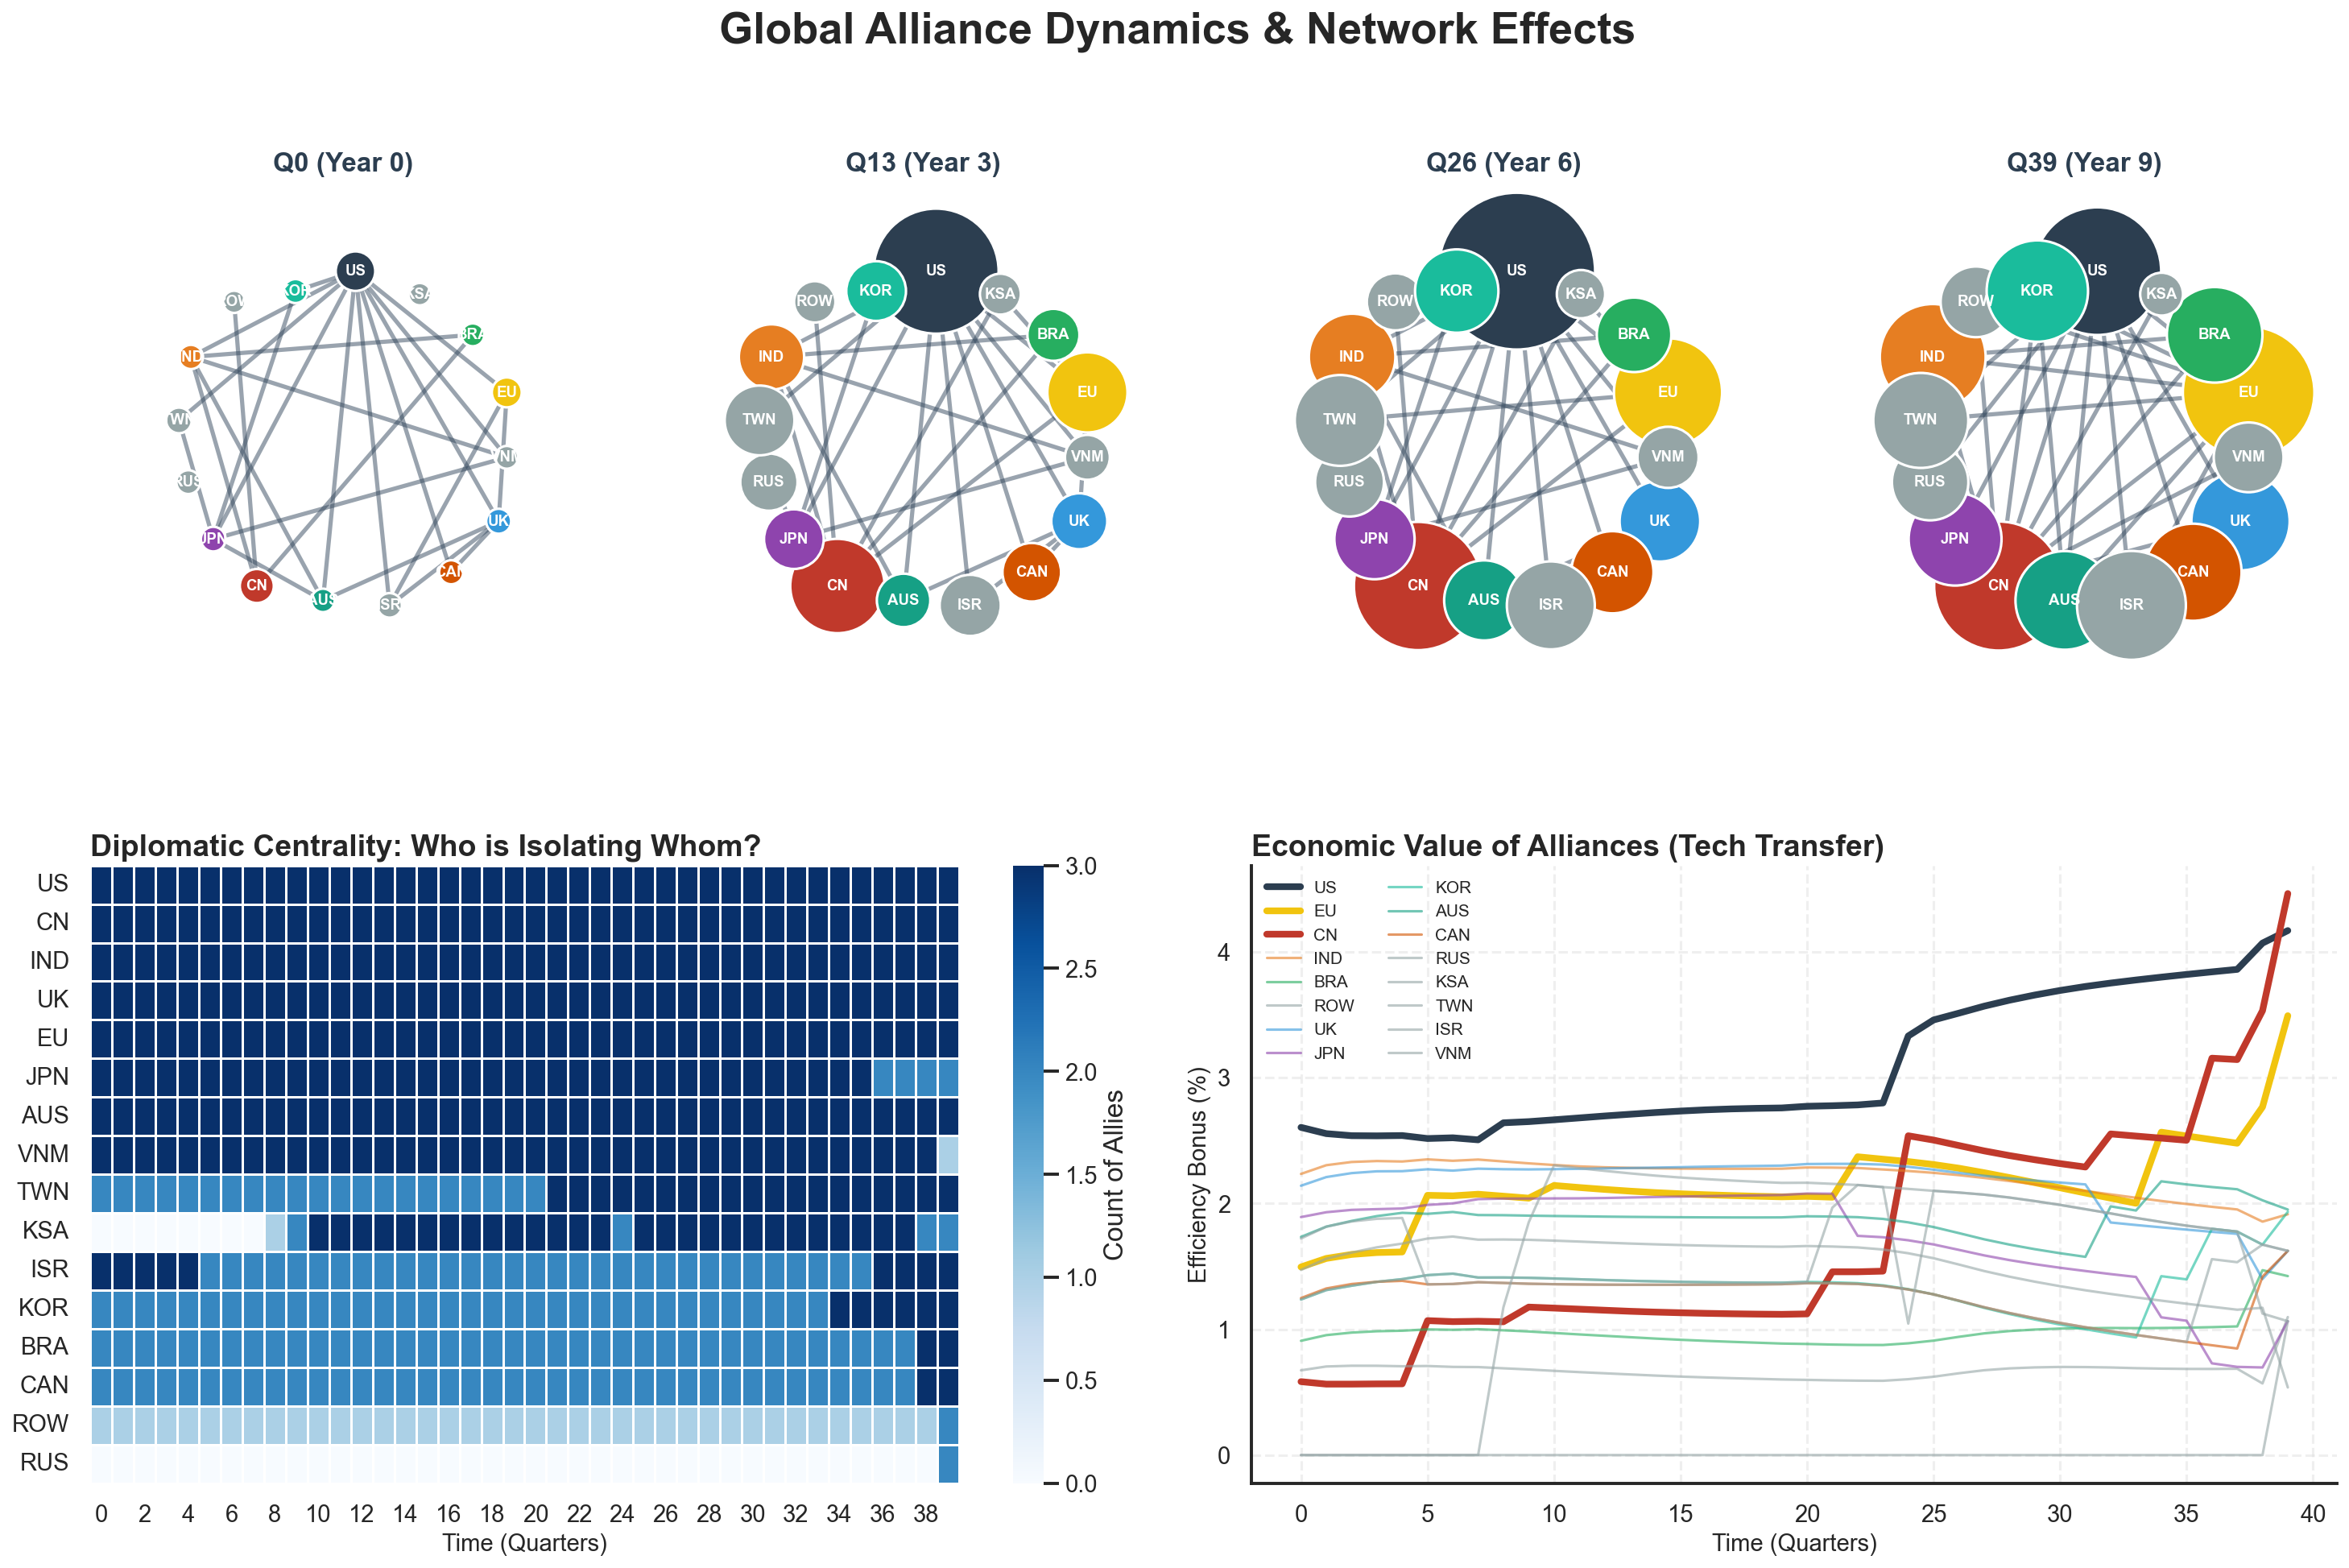

In [2]:
# main.py
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from geoai.engine import GeoAIGame
from geoai.policies import policy_strategic_personas, reset_planners
from geoai.config import Config
from geoai.plotting import set_publication_style, get_color

def run_with_tracking(cfg):
    game = GeoAIGame(cfg)
    history_allies = []
    history_network_bonus = []
    
    # [IMPORTANT] Reset global state
    reset_planners()
    np.random.seed(cfg.seed)
    
    print("Running simulation with network tracking...")
    for t in range(cfg.T):
        game.step(t, policy=policy_strategic_personas)
        
        # Snapshot Allies
        step_allies = {a: set(game.state[a].allies) for a in cfg.actors}
        history_allies.append(step_allies)
        
        # Snapshot Bonus
        total_K = sum(game.state[a].K for a in cfg.actors) + 1e-9
        step_bonus = {}
        for a in cfg.actors:
            ally_power = sum(game.state[ally].K for ally in game.state[a].allies)
            step_bonus[a] = 0.05 * (ally_power / total_K)
        history_network_bonus.append(step_bonus)
        
    df = pd.DataFrame([pd.Series(l.__dict__) for l in game.logs])
    return df, history_allies, history_network_bonus

def plot_alliance_dashboard(df, history_allies, history_network_bonus, cfg):
    set_publication_style()
    
    fig = plt.figure(figsize=(24, 14))
    gs = gridspec.GridSpec(2, 4, height_ratios=[1, 1.2], wspace=0.15, hspace=0.3)
    
    # --- A. Network Snapshots (Fixed Layout) ---
    times = np.linspace(0, cfg.T-1, 4, dtype=int)
    
    G_total = nx.Graph()
    G_total.add_nodes_from(cfg.actors)
    G_total.add_edge("US", "CN", weight=0.0) # Force separation
    fixed_pos = nx.spring_layout(G_total, k=1.2, seed=42, iterations=100)

    for i, t in enumerate(times):
        ax = fig.add_subplot(gs[0, i])
        G = nx.Graph(); G.add_nodes_from(cfg.actors)
        snapshot = history_allies[t]
        edges = set()
        for a, allies in snapshot.items():
            for b in allies:
                u, v = sorted((a, b))
                edges.add((u, v))
        G.add_edges_from(edges)
        
        caps = df[df['t'] == t].set_index('actor')['Cap']
        node_sizes = [caps.get(n, 0.1) * 300 + 100 for n in G.nodes()]
        colors = [get_color(n) for n in G.nodes()]
        
        nx.draw_networkx_nodes(G, fixed_pos, node_size=node_sizes, node_color=colors, alpha=1.0, ax=ax, edgecolors='white', linewidths=1.5)
        nx.draw_networkx_edges(G, fixed_pos, width=2.5, alpha=0.5, edge_color="#34495E", ax=ax)
        nx.draw_networkx_labels(G, fixed_pos, font_color='white', font_weight='bold', font_size=9, ax=ax)
        
        ax.margins(0.20) 
        
        ax.set_title(f"Q{t} (Year {t//4})", fontweight='bold', fontsize=16, color="#2C3E50")
        ax.axis('off')

    # --- B. Diplomatic Centrality Heatmap ---
    ax_heat = fig.add_subplot(gs[1, :2])
    centrality_data = []
    for t in range(cfg.T):
        row = {a: len(history_allies[t][a]) for a in cfg.actors}
        row['t'] = t
        centrality_data.append(row)
    
    heat_df = pd.DataFrame(centrality_data).set_index('t').T
    sorted_actors = heat_df.sum(axis=1).sort_values(ascending=False).index
    heat_df = heat_df.loc[sorted_actors]
    
    sns.heatmap(heat_df, cmap="Blues", ax=ax_heat, cbar_kws={'label': 'Count of Allies'},
                linewidths=0.5, linecolor='white', vmin=0, vmax=3)
    
    ax_heat.set_title("Diplomatic Centrality: Who is Isolating Whom?", fontweight='bold', fontsize=18, loc='left')
    ax_heat.set_xlabel("Time (Quarters)", fontsize=14)

    # --- C. Network Effect Value ---
    ax_line = fig.add_subplot(gs[1, 2:])
    bonus_df = pd.DataFrame(history_network_bonus)
    active = bonus_df.columns[bonus_df.max() > 0.001]
    
    for a in active:
        color = get_color(a)
        lw = 4.0 if a in ["US", "CN", "EU"] else 1.5
        alpha = 1.0 if a in ["US", "CN", "EU"] else 0.6
        ax_line.plot(bonus_df.index, bonus_df[a] * 100, linewidth=lw, label=a, color=color, alpha=alpha)
        
    ax_line.set_title("Economic Value of Alliances (Tech Transfer)", fontweight='bold', fontsize=18, loc='left')
    ax_line.set_ylabel("Efficiency Bonus (%)", fontsize=14)
    ax_line.set_xlabel("Time (Quarters)", fontsize=14)
    ax_line.legend(loc='upper left', ncol=2, fontsize=10, frameon=False)
    
    fig.suptitle("Global Alliance Dynamics & Network Effects", fontsize=26, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.savefig('figures/alliance_dashboard.png', dpi=150)

if __name__ == "__main__":
    cfg = create_empirically_grounded_config()
    df, allies, bonus = run_with_tracking(cfg)
    plot_alliance_dashboard(df, allies, bonus, cfg)

Here's my current codebase, for a project I'm doing. My idea was to develop a quantitative method for better scenario planning, to guide policy-makers and improve tooling in foresight. Your task is to provide input on whether it's at the MVP stage and on whether I can focus on implementing a concrete scenario to showcase the value of my tool. If not, let me know what's missing. I attach the results too, for you to carefully and thoroughly inspect them, to gauge whether they paint a coherent picture overall.

Role: Act as a Senior Computational Social Scientist, Macroeconomist, AI expert and Geopolitical Strategist. Your tone should be rigorous, critical, and objective. Avoid affirming the model simply to be polite; I require a "Red Team" assessment of the simulation's validity.
Context: I am developing a simulation for quantitative scenario planning in AI geopolitics. This tool will be used to inform policy-making.
Task: Critique the attached simulation logic and interpret the results. You must evaluate the simulation against standard International Relations (IR) and complexity science frameworks.
Structure your response into the following four sections:
1. Structural & Logic Audit

Analyze the causal mechanisms: Do the interaction rules between agents logically lead to the observed macro-outcomes?
Balance Check: Evaluate the granularity of the sub-systems. specifically, compare the economic engine against the agent policy/behavioral models. Is one disproportionately complex compared to the other? Does this imbalance skew the results?
2. Interpretation of Results

Look at the attached data. Are there emergent patterns that defy intuition?
Distinguish between genuine insight and potential artifacts of parameter tuning (overfitting).
3. Literature Benchmarking

Compare this approach to existing methodologies in AI governance modeling or geopolitical game theory (e.g., contest success functions, multi-agent reinforcement learning in IR).
What variables or dynamics are commonly present in the literature but missing here?
4. Critical Gap Analysis & Recommendations

Identify the "Weakest Link": Which assumption is the most fragile?
Propose specific variables or interaction rules to add to make the agent behavior as robust as the economic description.

Your task is to inspect my codebase, reflect on what I'm doing and on its scientific soundness. Is it appropriate for me to present it as a PoC to a foresight team of a policy-maker? If not, why/what's lacking or what's wrong.

Also, your secondary task is to ground these parameters as much as possible in real-world data. Use trusted sources and reflect on which macro trends or insights may be useful for this task.